**PILAR ARIAS VAZQUEZ, ÁLVARO GARCÍA CID, YEDRA MARTÍN OLMOS, AMAYA SARASA COLINA**

**<GRUPO 7>**

# IMPORTAMOS LIBRERÍAS Y DATOS

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
assert train_images.shape == (60000,28,28)
assert test_images.shape == (10000,28,28)
assert train_labels.shape == (60000,)
assert test_labels.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


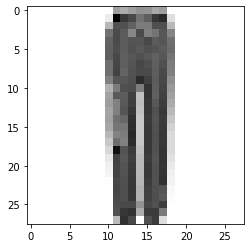

In [4]:
digit = train_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [5]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32') / 255
train_labels = train_labels.reshape((60000,1))
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32') / 255
test_labels = test_labels.reshape((10000,1))

In [6]:
print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28, 1)
(60000, 1)


# CASOS

## CASO 1.1

In [7]:
model = Sequential()
model.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [8]:
model.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [9]:
history=model.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 13s 5ms/step - loss: 1.0241 - accuracy: 0.6460 - val_loss: 0.7033 - val_accuracy: 0.7292
Epoch 2/5
960/960 [==============================] - 3s 4ms/step - loss: 0.5995 - accuracy: 0.7809 - val_loss: 0.5351 - val_accuracy: 0.8059
Epoch 3/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5179 - accuracy: 0.8140 - val_loss: 0.4882 - val_accuracy: 0.8291
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4721 - accuracy: 0.8313 - val_loss: 0.4662 - val_accuracy: 0.8311
Epoch 5/5
960/960 [==============================] - 3s 4ms/step - loss: 0.4425 - accuracy: 0.8437 - val_loss: 0.4367 - val_accuracy: 0.8471


Test loss: 0.4231255352497101 / Test accuracy: 0.852066695690155


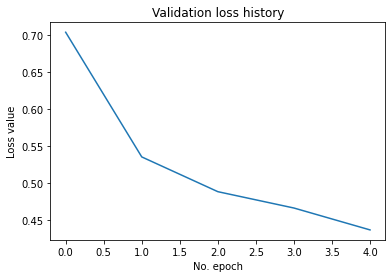

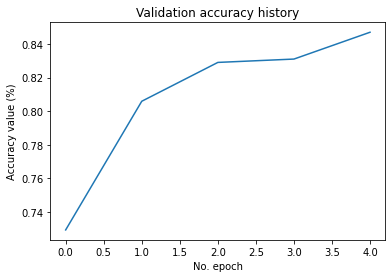

In [10]:
# Generamos las métricas de generalización
score = model.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## CASO 1.2

In [11]:
model12 = Sequential()
model12.add(Conv2D(32, (5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model12.add(MaxPooling2D((2, 2)))

model12.add(Conv2D(64, (5, 5), strides=(1, 1), activation='relu'))
model12.add(MaxPooling2D((2, 2)))

model12.add(Flatten())
model12.add(Dense(10, activation='softmax'))
model12.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [12]:
model12.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [13]:
history12=model12.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 4s 4ms/step - loss: 1.0331 - accuracy: 0.6474 - val_loss: 0.6318 - val_accuracy: 0.7774
Epoch 2/25
960/960 [==============================] - 3s 4ms/step - loss: 0.5985 - accuracy: 0.7819 - val_loss: 0.5597 - val_accuracy: 0.8000
Epoch 3/25
960/960 [==============================] - 3s 4ms/step - loss: 0.5248 - accuracy: 0.8109 - val_loss: 0.4922 - val_accuracy: 0.8217
Epoch 4/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4767 - accuracy: 0.8317 - val_loss: 0.4731 - val_accuracy: 0.8328
Epoch 5/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4475 - accuracy: 0.8426 - val_loss: 0.4506 - val_accuracy: 0.8422
Epoch 6/25
960/960 [==============================] - 3s 4ms/step - loss: 0.4250 - accuracy: 0.8514 - val_loss: 0.4240 - val_accuracy: 0.8491
Epoch 7/25
960/960 [==============================] - 3s 3ms/step - loss: 0.4069 - accuracy: 0.8584 - val_loss: 0.4366 - val_accuracy: 0.8457
Epoch 

Test loss: 0.29578208923339844 / Test accuracy: 0.8956999778747559


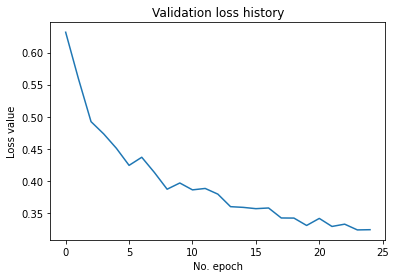

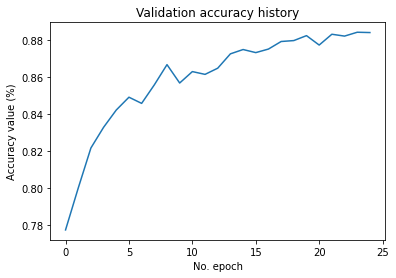

In [14]:
# Generamos las métricas de generalización
score = model12.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history12.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history12.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## CASO 1.3

In [15]:
model13 = Sequential()
model13.add(Conv2D(32, (5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1)))
model13.add(MaxPooling2D((2, 2)))

model13.add(Conv2D(64, (5, 5), strides=(1, 1), activation='tanh'))
model13.add(MaxPooling2D((2, 2)))

model13.add(Flatten())
model13.add(Dense(10, activation='softmax'))
model13.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [16]:
model13.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [17]:
history13=model13.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 4s 3ms/step - loss: 0.9668 - accuracy: 0.6821 - val_loss: 0.6334 - val_accuracy: 0.7656
Epoch 2/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5851 - accuracy: 0.7862 - val_loss: 0.5342 - val_accuracy: 0.8003
Epoch 3/5
960/960 [==============================] - 3s 3ms/step - loss: 0.5102 - accuracy: 0.8156 - val_loss: 0.4845 - val_accuracy: 0.8239
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4671 - accuracy: 0.8310 - val_loss: 0.4515 - val_accuracy: 0.8370
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 0.4377 - accuracy: 0.8448 - val_loss: 0.4297 - val_accuracy: 0.8459


Test loss: 0.422305703163147 / Test accuracy: 0.8498166799545288


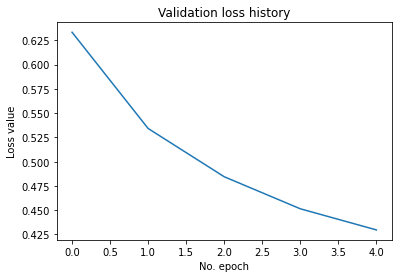

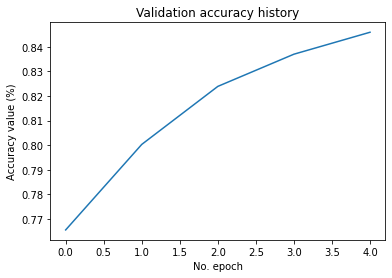

In [18]:
# Generamos las métricas de generalización
score = model13.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history13.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history13.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## CASO 2.1

In [19]:
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(65,activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 65)               

In [20]:
model2.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [21]:
history2=model2.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 5s 4ms/step - loss: 1.1082 - accuracy: 0.6170 - val_loss: 0.7541 - val_accuracy: 0.7303
Epoch 2/5
960/960 [==============================] - 4s 4ms/step - loss: 0.6874 - accuracy: 0.7408 - val_loss: 0.6273 - val_accuracy: 0.7713
Epoch 3/5
960/960 [==============================] - 3s 4ms/step - loss: 0.6003 - accuracy: 0.7735 - val_loss: 0.5617 - val_accuracy: 0.7875
Epoch 4/5
960/960 [==============================] - 3s 4ms/step - loss: 0.5454 - accuracy: 0.7979 - val_loss: 0.5395 - val_accuracy: 0.8051
Epoch 5/5
960/960 [==============================] - 3s 4ms/step - loss: 0.5065 - accuracy: 0.8125 - val_loss: 0.5025 - val_accuracy: 0.8137


Test loss: 0.49206194281578064 / Test accuracy: 0.8190500140190125


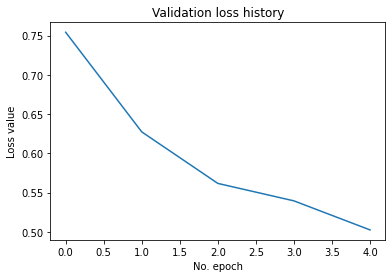

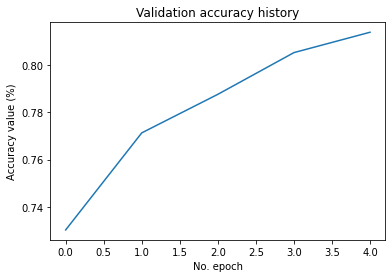

In [22]:
# Generamos las métricas de generalización
score = model2.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history2.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history2.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## CASO 2.2

In [23]:
model22 = Sequential()
model22.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
model22.add(MaxPooling2D((2, 2)))

model22.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model22.add(MaxPooling2D((2, 2)))

model22.add(Flatten())
model22.add(Dense(65,activation='relu'))
model22.add(Dense(10, activation='softmax'))
model22.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_5 (Dense)             (None, 65)               

In [24]:
model22.compile(loss=sparse_categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [25]:
history22=model22.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 4s 4ms/step - loss: 1.0833 - accuracy: 0.6276 - val_loss: 0.7457 - val_accuracy: 0.7128
Epoch 2/25
960/960 [==============================] - 4s 4ms/step - loss: 0.6710 - accuracy: 0.7456 - val_loss: 0.6211 - val_accuracy: 0.7717
Epoch 3/25
960/960 [==============================] - 3s 4ms/step - loss: 0.5879 - accuracy: 0.7778 - val_loss: 0.5678 - val_accuracy: 0.7915
Epoch 4/25
960/960 [==============================] - 4s 4ms/step - loss: 0.5359 - accuracy: 0.8019 - val_loss: 0.5283 - val_accuracy: 0.8074
Epoch 5/25
960/960 [==============================] - 3s 4ms/step - loss: 0.4986 - accuracy: 0.8177 - val_loss: 0.4873 - val_accuracy: 0.8193
Epoch 6/25
960/960 [==============================] - 4s 4ms/step - loss: 0.4671 - accuracy: 0.8296 - val_loss: 0.4701 - val_accuracy: 0.8319
Epoch 7/25
960/960 [==============================] - 3s 4ms/step - loss: 0.4446 - accuracy: 0.8390 - val_loss: 0.4432 - val_accuracy: 0.8371
Epoch 

Test loss: 0.27530238032341003 / Test accuracy: 0.9007333517074585


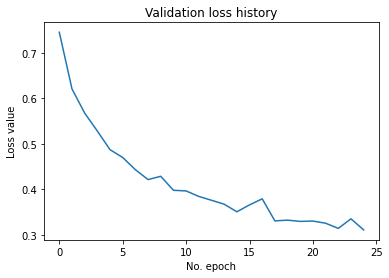

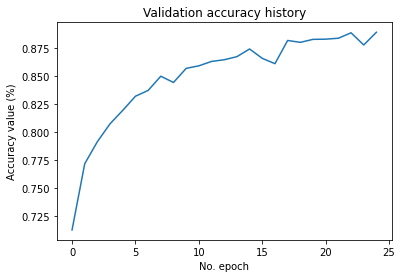

In [26]:
# Generamos las métricas de generalización
score = model22.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history22.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history22.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## CASO 3.1

In [27]:
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(65,activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 65)               

In [28]:
model3.compile(loss=sparse_categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [29]:
history3=model3.fit(train_images, train_labels,
          batch_size=50,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
960/960 [==============================] - 4s 4ms/step - loss: 0.5320 - accuracy: 0.8069 - val_loss: 0.3838 - val_accuracy: 0.8658
Epoch 2/5
960/960 [==============================] - 4s 4ms/step - loss: 0.3534 - accuracy: 0.8727 - val_loss: 0.3457 - val_accuracy: 0.8737
Epoch 3/5
960/960 [==============================] - 4s 4ms/step - loss: 0.3052 - accuracy: 0.8875 - val_loss: 0.3088 - val_accuracy: 0.8884
Epoch 4/5
960/960 [==============================] - 3s 4ms/step - loss: 0.2760 - accuracy: 0.8975 - val_loss: 0.2949 - val_accuracy: 0.8947
Epoch 5/5
960/960 [==============================] - 3s 4ms/step - loss: 0.2517 - accuracy: 0.9071 - val_loss: 0.2964 - val_accuracy: 0.8924


Test loss: 0.24603988230228424 / Test accuracy: 0.9092833399772644


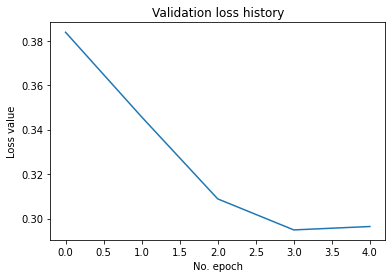

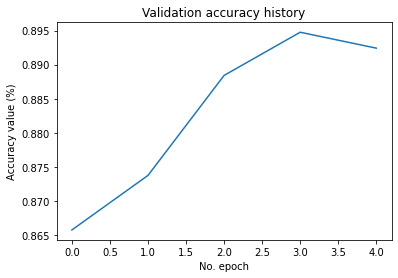

In [30]:
# Generamos las métricas de generalización
score = model3.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history3.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history3.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## CASO 3.2

In [31]:
model32 = Sequential()
model32.add(Conv2D(64, (7, 7), strides=(1, 1), activation='relu', input_shape=(28,28,1)))
model32.add(MaxPooling2D((2, 2)))

model32.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model32.add(MaxPooling2D((2, 2)))

model32.add(Flatten())
model32.add(Dense(65,activation='relu'))
model32.add(Dense(10, activation='softmax'))
model32.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 65)               

In [32]:
model32.compile(loss=sparse_categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [33]:
history32=model32.fit(train_images, train_labels,
          batch_size=50,
          epochs=25,
          verbose=1,
          validation_split=0.2)

Epoch 1/25
960/960 [==============================] - 4s 4ms/step - loss: 0.5469 - accuracy: 0.7989 - val_loss: 0.4029 - val_accuracy: 0.8537
Epoch 2/25
960/960 [==============================] - 4s 4ms/step - loss: 0.3594 - accuracy: 0.8701 - val_loss: 0.3356 - val_accuracy: 0.8779
Epoch 3/25
960/960 [==============================] - 3s 4ms/step - loss: 0.3123 - accuracy: 0.8845 - val_loss: 0.3188 - val_accuracy: 0.8824
Epoch 4/25
960/960 [==============================] - 4s 4ms/step - loss: 0.2802 - accuracy: 0.8977 - val_loss: 0.2918 - val_accuracy: 0.8947
Epoch 5/25
960/960 [==============================] - 3s 4ms/step - loss: 0.2565 - accuracy: 0.9042 - val_loss: 0.2835 - val_accuracy: 0.8978
Epoch 6/25
960/960 [==============================] - 4s 4ms/step - loss: 0.2345 - accuracy: 0.9128 - val_loss: 0.2772 - val_accuracy: 0.9011
Epoch 7/25
960/960 [==============================] - 4s 4ms/step - loss: 0.2166 - accuracy: 0.9189 - val_loss: 0.2722 - val_accuracy: 0.9014
Epoch 

Test loss: 0.14000554382801056 / Test accuracy: 0.9652000069618225


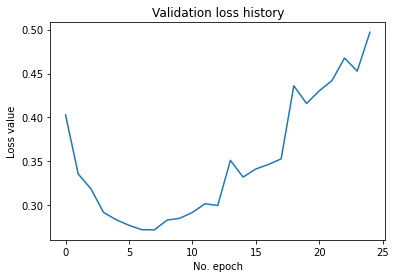

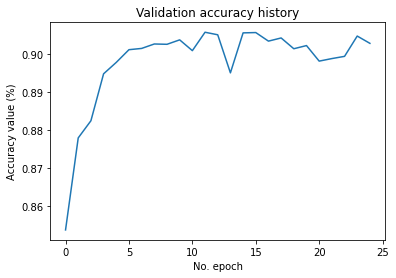

In [34]:
# Generamos las métricas de generalización
score = model32.evaluate(train_images, train_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualizamos history
# Pintamos history: Pérdida
plt.plot(history32.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Pintamos history: Precisión
plt.plot(history32.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

# ANÁLISIS RESULTADOS

In [35]:
predictions = model.predict(test_images)
predictions2 = model2.predict(test_images)
predictions3 = model3.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [36]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [39]:
test_labels=test_labels.reshape(10000,)

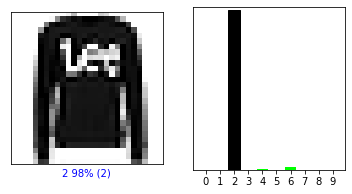

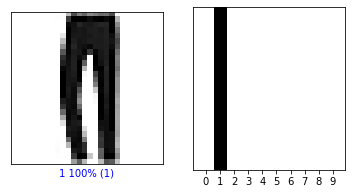

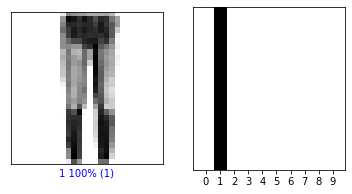

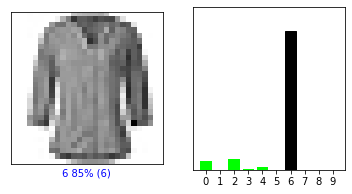

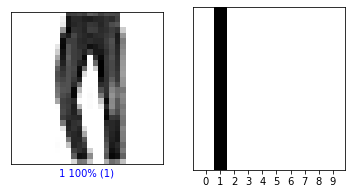

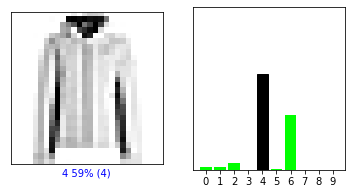

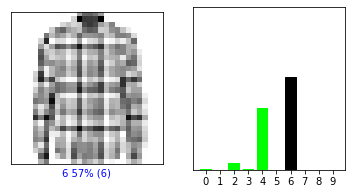

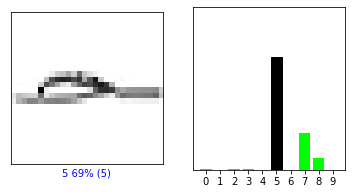

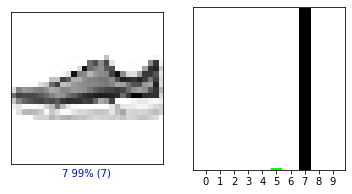

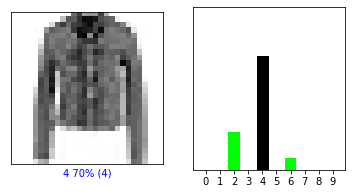

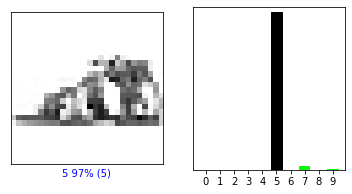

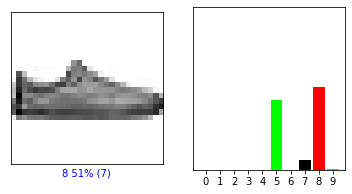

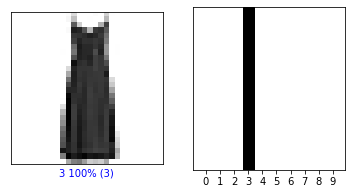

In [41]:
i = 0
for j in range (1,14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions[j], test_labels)
  plt.show()

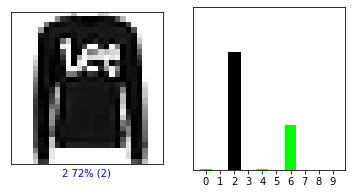

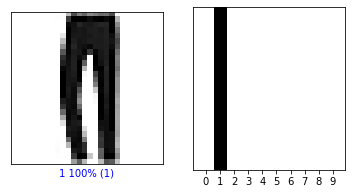

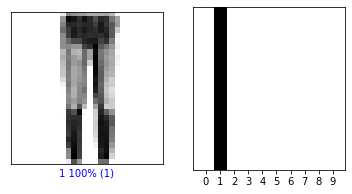

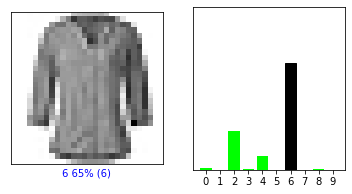

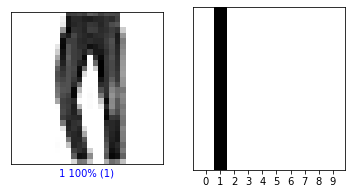

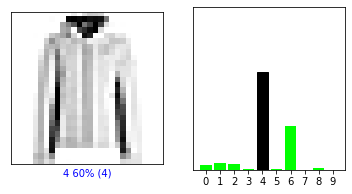

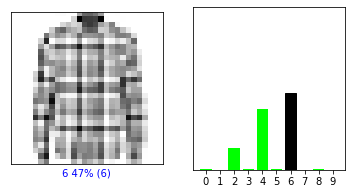

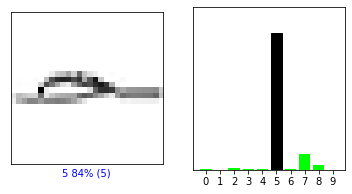

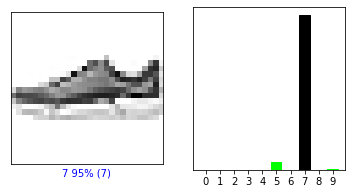

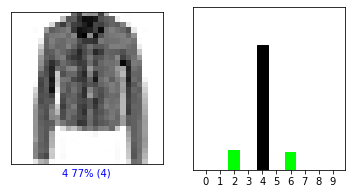

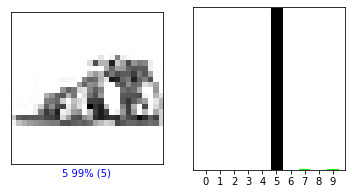

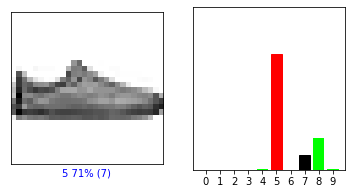

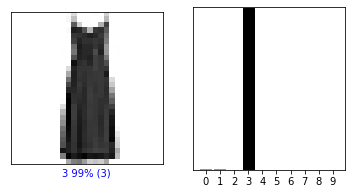

In [42]:
for j in range (1,14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions2[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions2[j], test_labels)
  plt.show()

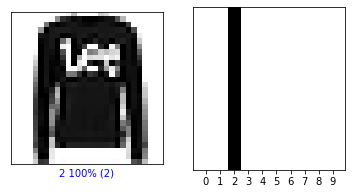

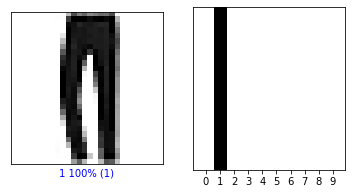

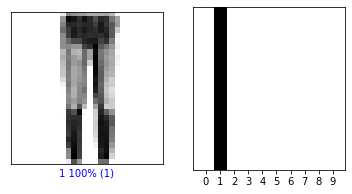

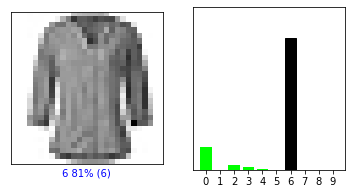

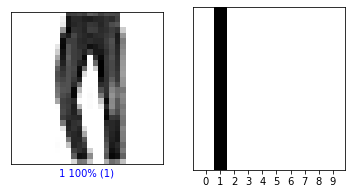

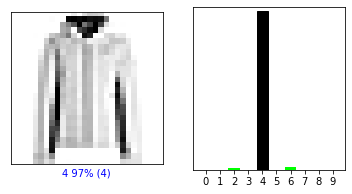

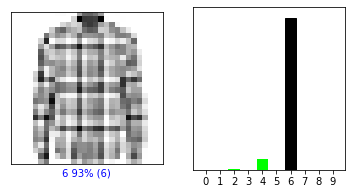

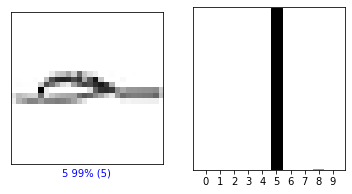

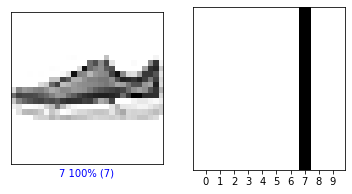

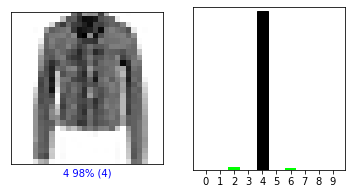

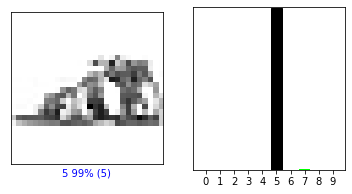

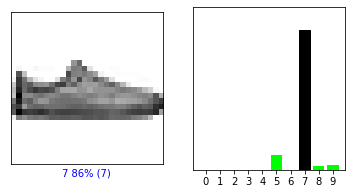

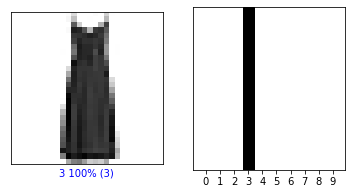

In [43]:
for j in range (1,14):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(j, predictions3[j], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(j, predictions3[j], test_labels)
  plt.show()